In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

---
# 1.

In [34]:
data = pd.read_csv("../data/student_scores.csv")
data = data.drop(columns=["#"])
data.head()

,HSGPA,ACT,CGPA
0,2.8,19,2.4
1,2.8,20,3.1
2,2.2,18,3.1
3,3.8,28,3.8
4,2.0,16,0.6


a. Perform a descriptive workup on these scores, obtaining means and standard deviations on 
all three variables and Pearson r's between HS GPA and COL GPA and between ACT and 
COL GPA.  Put the results in the appropriate part of the answer sheet.  Carry out to 3 decimal 
places

Find means, stds

In [35]:
temp = data.to_numpy().T

means = [np.mean(col) for col in temp]
stds = [np.std(col) for col in temp]

for i in range(temp.shape[0]):
    col_name = data.columns[i]
    print(f"Mean {col_name}: {means[i]}\nStd {col_name}: {stds[i]}")

Mean HSGPA: 3.1100000000000003
Std HSGPA: 0.5961543424315552
Mean ACT: 22.3
Std ACT: 4.450842616853577
Mean CGPA: 2.8024999999999998
Std CGPA: 0.7747539932133296


Find pearson R

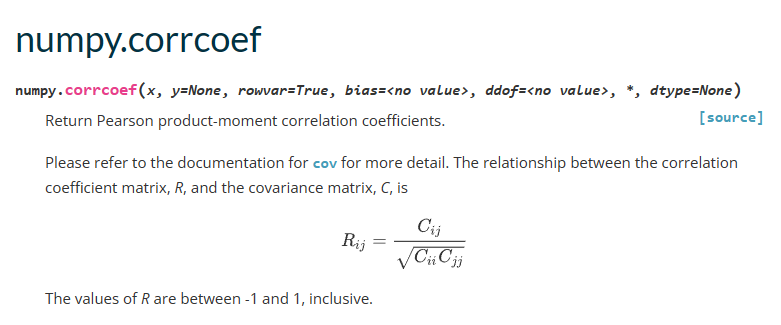

In [36]:
pearson1 = np.corrcoef(data["HSGPA"], data["CGPA"])
pearson2 = np.corrcoef(data["ACT"], data["CGPA"])

print(pearson1)
print(pearson2)

[[1.         0.68249287]
 [0.68249287 1.        ]]
[[1.         0.59717692]
 [0.59717692 1.        ]]


b. Create two scatterplots - one for COL GPA vs. HS GPA and the other for COL GPA vs. 
ACT.  Treat COL GPA as the dependent variable in both – that is as the variable to be 
predicted. Create the scatterplots by hand on the answer sheets.   Put the best fitting straight 
line on the scatterplot.

COL GPA as dependent variable => y=CGPA

- Perform linear regression to find the best fitting line

In [37]:
x1 = data["HSGPA"].to_numpy()
x2 = data["ACT"].to_numpy()
y = data["CGPA"].to_numpy()

x1_h = np.mean(x1)
x2_h = np.mean(x2)
y_h = np.mean(y)

calculate w1

In [38]:
cov1 = np.cov(x1, y)[0, 1]
cov2 = np.cov(x2, y)[0, 1]
var1 = np.var(x1)
var2 = np.var(x2)

w1 = cov1/var1
w1_h = cov2/var2

w0 = y_h - w1*x1_h
w0_h = y_h - w1_h*x2_h

- function for fitting line

In [39]:
X1 = np.linspace(start=np.min(x1), stop=np.max(x1), num=1000)
X2 = np.linspace(np.min(x2), np.max(x2), 1000)
Y1 = w0 + w1 * X1
Y2 = w0_h + w1_h * X2

- plot

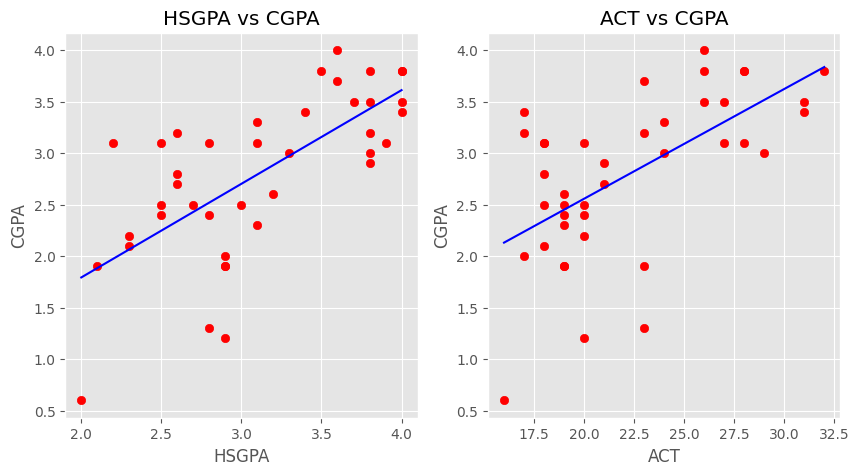

In [40]:
plt.style.use("ggplot")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(X1, Y1, color="blue")
axes[0].scatter(x1, y, color="red")
axes[0].set_xlabel("HSGPA")
axes[0].set_ylabel("CGPA")
axes[0].set_title("HSGPA vs CGPA")

axes[1].plot(X2, Y2, color="blue")
axes[1].scatter(x2, y, color="red")
axes[1].set_xlabel("ACT")
axes[1].set_ylabel("CGPA")
axes[1].set_title("ACT vs CGPA")

plt.show()


c. Suppose a student has obtained a high school GPA of 3.2.  What would that student’s 
predicted college GPA be?  Use the formula method to create the predicted Y.

In [41]:
test_hsgpa = 3.2
pred_cgpa = w0 + w1 * test_hsgpa
print(f"Predicted CGPA: {pred_cgpa}")

Predicted CGPA: 2.884373079087485


d.  Suppose a student has obtained a 28 on the ACT.  What would that student’s predicted 
college GPA be?  Use the formula method to create the predicted Y. 

In [42]:
test_act = 28
pred_cgpa = w0_h + w1_h * test_act
print(f"Predicted CGPA: {pred_cgpa}")

Predicted CGPA: 3.410207839863317


e.  State which is the better predictor of COL GPA - HS GPA or ACH TEST.  Give the basis 
for your answer

In [43]:
y_pred1 = w0 + w1 * x1
y_pred2 = w0_h + w1_h * x2


error1 = np.mean(y - y_pred1)
error2 = np.mean(y - y_pred2)

print(f"Error HSGPA vs CGPA: {error1}")
print(f"Error ACT vs CGPA: {error2}")

Error HSGPA vs CGPA: 5.884182030513329e-16
Error ACT vs CGPA: 3.219646771412954e-16


=> ACT vs CGPA has smaller Error => It is better

---
# 2.

Using correlation analysis, determine which of the three characteristics - sugar, fat, or fiber –
was most highly related to the taste ratings.  The data are below.

In [44]:
df = pd.read_csv("../data/cereals.csv")
df.head()

,Cereal,Category,Taste,Price,Size,Calories,Fat,Fiber,Sugar
0,General Mills Total,Raisin Bran,76,22,1.00,180,1.00,5.00,20.00
1,Sam's American Choice,Raisin Bran,73,10,1.00,200,1.00,5.00,22.00
2,Kellogg's,Raisin Bran,73,14,1.00,170,1.00,7.00,18.00
3,Publix,Raisin Bran,70,10,0.75,253,1.33,8.00,21.33
4,Pathmark,Raisin Bran,67,11,0.75,253,1.33,9.33,22.67


## Get X, Y

In [45]:
X = df.iloc[:, 6:]
Y = df.iloc[:, 2]
X

,Fat,Fiber,Sugar
0,1.00,5.00,20.00
1,1.00,5.00,22.00
2,1.00,7.00,18.00
3,1.33,8.00,21.33
4,1.33,9.33,22.67
5,1.33,8.00,21.33
6,1.33,10.67,26.67
7,1.33,8.00,21.33
8,1.00,8.00,20.00
9,1.33,8.00,21.33


In [46]:
corr1 = np.corrcoef(X["Fat"], Y)[0, 1]
corr2 = np.corrcoef(X["Fiber"], Y)[0, 1]
corr3 = np.corrcoef(X["Sugar"], Y)[0, 1]

correlations = np.abs([corr1, corr2, corr3])
idx = np.where(correlations == np.max(correlations))[0][0]
print(f"The most correlate variable to the taste rating is: {X.columns[idx]}")

The most correlate variable to the taste rating is: Sugar
